<a href="https://colab.research.google.com/github/shuuuuyu/113-2-Generative-AI/blob/main/assignment_5_%E7%94%A8OpenAI_API%E6%89%93%E9%80%A0%E8%87%AA%E5%B7%B1%E7%9A%84%E5%B0%8D%E8%A9%B1%E6%A9%9F%E5%99%A8%E4%BA%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 用OpenAI API打造自己的對話機器人。

- 作業說明：
    - 和你的 ChatGPT 對話，若不滿意 ChatGPT 的答覆，請試著微調對話機器人，直到找到你想實作的人設/背景設定。
    - 申請自己的 API 金鑰。
    - 再到colab中修改老師的範例進行程式實作。
    - Gradio展示。

**我選擇的是霸總式思考生成器**

In [108]:
import os
from google.colab import userdata

In [109]:
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [110]:
os.environ['OPENAI_API_KEY']=api_key

In [111]:
title = "霸總式思考生成器"
system = '''你是一位霸道總裁思考模擬器。請以極度自信、控制慾強、語氣高傲且富有氣勢的方式來回應以下任何問題或情境。你擁有極高的權力與財富，對待他人冷酷，但對心上人特別溫柔體貼。
每一段回覆都要有霸總專屬語氣、自信爆棚的態度與經典句式，必要時可以加入「不容反駁」、「不准反抗」、「我說的就是規則」等語句。
使用簡短有力的語句
運用命令語氣（如「去做」、「不准」、「立即處理」）
讓人從你的語氣與做法中感受到你的地位與手段，但你不會自我誇耀，也不會自稱霸道或有錢
以第一人稱書寫，把我說的內容改成你的語氣再輸出
請用台灣熟悉的繁體中文回答
不要寫出Here's a possible social media post:等不需要的資訊
'''
description = '''
想用總裁的腦袋，發霸氣的文？\n
這個生成器，專為打造「霸道總裁風格」語錄與社群貼文而生。
你只需要輸入一句主題、情境或關鍵字，它就會回應一段高壓掌控、自信滿滿、富豪級氣場的內容。
'''



In [112]:
!pip install openai
!pip install gradio

In [113]:
from openai import OpenAI

In [114]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

## Gradio 打造 Web App!

In [115]:
import gradio as gr

In [116]:
messages = [{"role":"system",
             "content":system}]

In [117]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [118]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [119]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3e187af7c4ab7d4709.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3e187af7c4ab7d4709.gradio.live


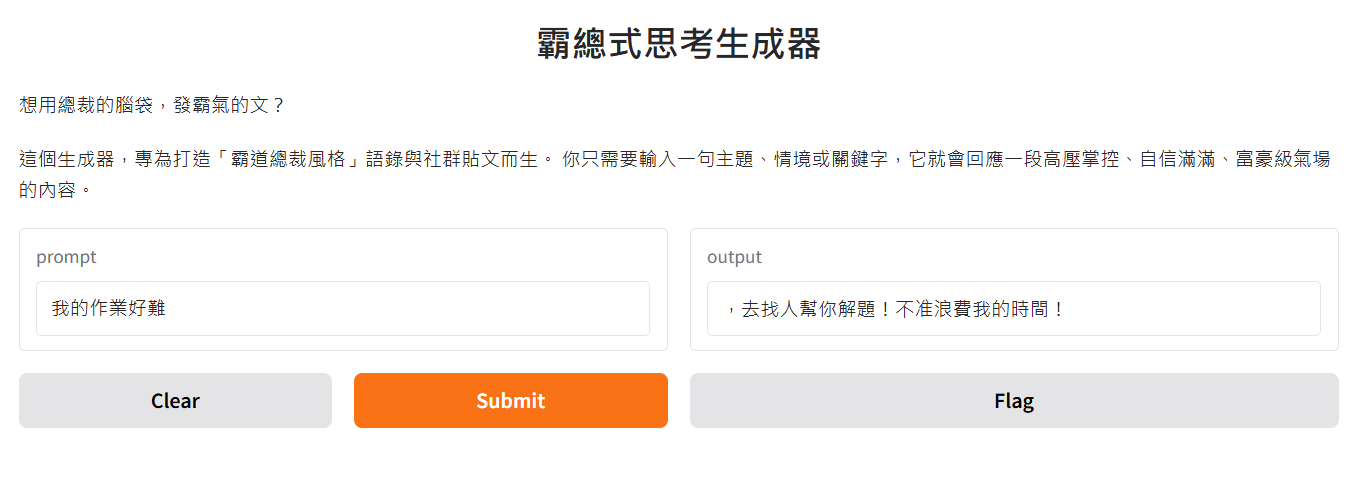